<a href="https://colab.research.google.com/github/t2wain/colab/blob/master/Learn_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [0]:
print (tf.__version__)

1.15.0-rc3


# Tensor properties

In [0]:
m1 = tf.constant([[1., 2.]])

m2 = tf.constant([[1],
                  [2]])

m3 = tf.constant([ [[1,2],
                    [3,4],
                    [5,6]],
                  
                    [[7,8],
                    [9,10],
                    [11,12]] ])

m4 = tf.constant(10.)

m5 = tf.constant([1., 2., 3.])

In [0]:
print('m1:', m1)
print('m2:', m2)
print('m3:', m3)
print('m4', m4)
print('m5', m5)
print('m1 shape:', m1.shape)

m1: Tensor("Const:0", shape=(1, 2), dtype=float32)
m2: Tensor("Const_1:0", shape=(2, 1), dtype=int32)
m3: Tensor("Const_2:0", shape=(2, 3, 2), dtype=int32)
m4 Tensor("Const_3:0", shape=(), dtype=float32)
m5 Tensor("Const_4:0", shape=(3,), dtype=float32)
m1 shape: (1, 2)


In [0]:
with tf.Session() as sess:
  print('m1 rank:', tf.rank(m1).eval())
  print('m2 rank:', tf.rank(m2).eval())
  print('m3 rank:', tf.rank(m3).eval())
  print('m4 rank:', tf.rank(m4).eval())
  print('m5 rank:', tf.rank(m5).eval())

m1 rank: 2
m2 rank: 2
m3 rank: 3
m4 rank: 0
m5 rank: 1


In [0]:
t1 = tf.zeros((1,2), tf.float32, 't1')
t2 = tf.ones((2,1), tf.int32, 't2')
t3 = tf.ones((2,3,2), tf.int32, 't3')

In [0]:
print('t1:', t1)
print('t2:', t2)
print('t3:', t3)

t1: Tensor("t1:0", shape=(1, 2), dtype=float32)
t2: Tensor("t2:0", shape=(2, 1), dtype=int32)
t3: Tensor("t3:0", shape=(2, 3, 2), dtype=int32)


In [0]:
x = tf.constant([1., 2.])
y = tf.constant([3., 4.])

In [0]:
x_neg = tf.negative(x)
z = tf.add(x,y)
z2 = tf.subtract(y,x)

In [0]:
print(z)

Tensor("Add:0", shape=(2,), dtype=float32)


In [0]:
with tf.Session() as sess:
  resultz = sess.run(z)
  resultz2 = sess.run(z2)

type(resultz)

numpy.ndarray

In [0]:
print(resultz)
print(resultz2)

[4. 6.]
[2. 2.]


In [0]:
with tf.Session() as sess:
  resultz = z.eval()
  resultz2 = z2.eval()

In [0]:
print(resultz)
print(resultz2)

[4. 6.]
[2. 2.]


In [0]:
sess = tf.InteractiveSession()
resultz = z.eval()
resultz2 = z2.eval()
sess.close()

print(resultz)
print(resultz2)

[4. 6.]
[2. 2.]


# Example 1

In [0]:
def ex1():
  sess = tf.InteractiveSession()
  raw_data = [1., 2., 8., -1., 0., 5.5, 6., 13]

  spikes = tf.Variable([False] * len(raw_data), name='spikes')
  spikes.initializer.run() # intial array to False

  for i in range(1, len(raw_data)):
    if raw_data[i] - raw_data[i-1] > 5:
      spikes_val = spikes.eval() # retrieve array from variable
      spikes_val[i] = True # set the data
      updater = tf.assign(spikes, spikes_val) # assign array back to variable
      result = updater.eval() # run updater

  sess.close()

  print(result)
  print(updater)

ex1()

[False False  True False False  True False  True]
Tensor("Assign_2:0", shape=(8,), dtype=bool_ref)


# Example 2

In [0]:
def ex2():
  raw_data = np.random.normal(10, 1, 100)

  alpha = tf.constant(0.05)
  curr_value = tf.placeholder(tf.float32) # input
  prev_avg = tf.Variable(0.)

  update_avg = alpha * curr_value + (1 - alpha) * prev_avg # operation

  init = tf.global_variables_initializer()

  with tf.Session() as sess:
    sess.run(init)
    for i in range(len(raw_data)):
      curr_avg = sess.run(update_avg, feed_dict={curr_value: raw_data[i]}) # run operation
      sess.run(tf.assign(prev_avg, curr_avg))
      print(raw_data[i], curr_avg)

ex2()

# Example 3

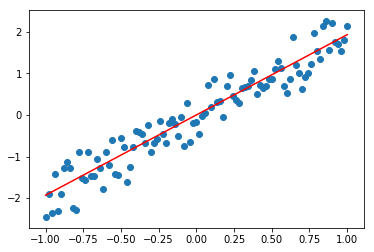

In [0]:
def ex3():
  learning_rate = 0.01
  training_epochs = 100

  # setup sample training data
  x_train = np.linspace(-1, 1, 101)
  y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33 # include noise

  # setup tensorflow graph
  X = tf.placeholder(tf.float32)
  Y = tf.placeholder(tf.float32)

  def model(X, w):
    return tf.multiply(X, w) # simple linear model

  w = tf.Variable(0.0, name="weights")
  y_model = model(X, w)
  cost = tf.square(Y-y_model)

  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(training_epochs):
      for (x, y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={X: x, Y: y}) # training
        w_val = sess.run(w) # model parameter result

  plt.scatter(x_train, y_train)

  y_learned = x_train*w_val

  plt.plot(x_train, y_learned, 'r')
  plt.show()

ex3()

# Example 4

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
calculated polynomial coeffients: [0.7462516 2.260809  4.1469126 4.819354  3.873754  4.696718 ]


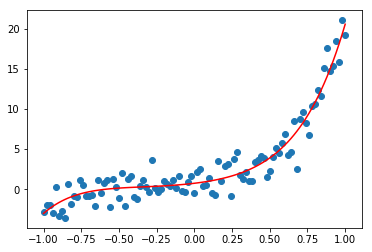

In [0]:
def ex4():

  # model hyper-parameters
  learning_rate = 0.01
  training_epochs = 40

  # generate sample data
  trX = np.linspace(-1, 1, 101)

  num_coeffs = 6
  trY_coeffs = [1, 2, 3, 4, 5, 6]
  trY = 0
  for i in range(num_coeffs):
    trY += trY_coeffs[i] * np.power(trX, i)

  trY += np.random.randn(*trX.shape) * 1.5 # add noise

  # setup tensorflow graph
  X = tf.placeholder(tf.float32)
  Y = tf.placeholder(tf.float32)

  def model(X, w): # polynominal model
    terms = []
    for i in range(num_coeffs):
      term = tf.multiply(w[i], tf.pow(X, i))
      terms.append(term)
    return tf.add_n(terms)

  w = tf.Variable([0.] * num_coeffs, name="parameters")
  y_model = model(X, w)

  cost = (tf.pow(Y-y_model, 2))
  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(training_epochs):
      for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y}) # training
      w_val = sess.run(w) # model parameter result

  print('calculated polynomial coeffients:', w_val)
  plt.scatter(trX, trY) # input data
  trY2 = 0
  for i in range(num_coeffs):
    trY2 += w_val[i] * np.power(trX, i) # predicted output

  plt.plot(trX, trY2, 'r') # predicted output
  plt.show()

ex4()

# Example 5

In [0]:
def ex5(reg_lambda_steps = [0., 0.05, 0.20]):
  learning_rate = 0.001
  training_epochs = 1000
  reg_lambda = 0.
  
  x_dataset = np.linspace(-1, 1, 100)

  num_coeffs = 9
  y_dataset_params = [0.] * num_coeffs
  y_dataset_params[2] = 1
  y_dataset = 0
  for i in range(num_coeffs):
    y_dataset += y_dataset_params[i] * np.power(x_dataset, i)
  y_dataset += np.random.randn(*x_dataset.shape) * 0.3 # add noise

  x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.3, random_state=42)

  X = tf.placeholder(tf.float32)
  Y = tf.placeholder(tf.float32)

  def model(X, w):
    terms = []
    for i in range(num_coeffs):
      term = tf.multiply(w[i], tf.pow(X, i))
      terms.append(term)
    return tf.add_n(terms)

  w = tf.Variable([0.] * num_coeffs, name="parameters")
  y_model = model(X, w)
  cost = tf.div(tf.add(tf.reduce_sum(tf.square(Y-y_model)),
                       tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w)))),
                2*x_train.size) # apply regularization
  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for reg_lambda in reg_lambda_steps: # evaluating different regularization setting
      for epoch in range(training_epochs):
        sess.run(train_op, feed_dict={X: x_train, Y: y_train})
      final_cost = sess.run(cost, feed_dict={X: x_test, Y:y_test})
      w_val = w.eval()
      print('coefficients', w_val)
      print('reg lambda', reg_lambda)
      print('final cost', final_cost)

      plt.scatter(x_test, y_test)
      
      y_predict = 0
      for i in range(num_coeffs):
        y_predict += w_val[i] * np.power(x_test, i)
      plt.scatter(x_test, y_predict)

      plt.show()


coefficients [ 0.16551083 -0.00407954  0.1419617   0.00186849  0.10685883  0.00530513
  0.08518125  0.00752386  0.07064064]
reg lambda 0.0
final cost 0.020486917


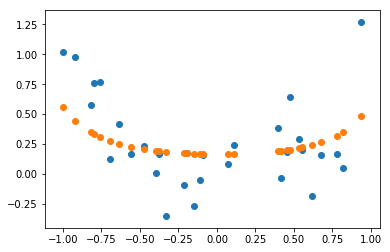

coefficients [ 0.1870968  -0.01292756  0.21102121 -0.00109742  0.16062316  0.00580762
  0.12771823  0.01037507  0.10531961]
reg lambda 0.05
final cost 0.017099502


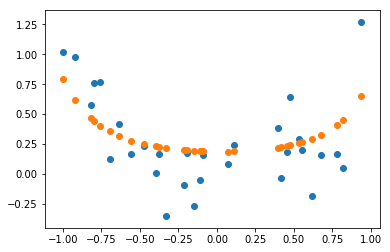

coefficients [ 0.17299695 -0.02100638  0.2548994  -0.00436026  0.19458066  0.00561695
  0.15378226  0.01232579  0.12582633]
reg lambda 5.0
final cost 0.01561461


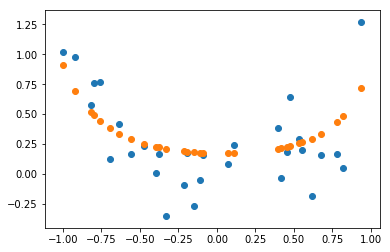

In [0]:
ex5([0., 0.05, 5.])

# Example 6

In [0]:
def ex6():
  learning_rate = 0.4
  training_epochs = 3000

  def sigmoid(x):
    return 1. / (1. + np.exp(-x))

  x1_label1 = np.random.normal(3, 1, 1000)
  x2_label1 = np.random.normal(2, 1, 1000)
  x1_label2 = np.random.normal(7, 1, 1000)
  x2_label2 = np.random.normal(6, 1, 1000)

  x1s = np.append(x1_label1, x1_label2)
  x2s = np.append(x2_label1, x2_label2)
  ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

  X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
  X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
  Y = tf.placeholder(tf.float32, shape=(None,), name="y")
  w = tf.Variable([0., 0., 0.], name="w", trainable=True)

  y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
  cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    prev_epoch = 0
    for epoch in range(training_epochs):
      err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
      #print(epoch, err)
      prev_epoch = epoch
      if abs(prev_err - err) < 0.00001:
        prev_err = err
        break
      prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

  x1_boundary, x2_boundary = [], []
  for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
      z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
      if abs(z - 0.5) < 0.01:
        x1_boundary.append(x1_test)
        x2_boundary.append(x2_test)

  print('epoch:', prev_epoch)
  print('error:', prev_err)
  plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
  plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
  plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
  plt.show()

epoch: 1585
error: 0.028027786


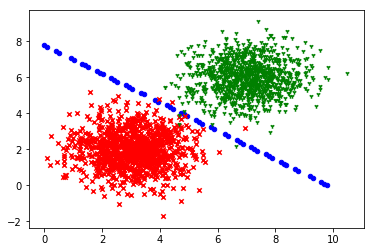

In [0]:
ex6()

# Example 7

In [0]:
def ex7_data(rcount = 100):
  # class 1 features
  x1_label0 = np.random.normal(1, 1, (rcount, 1)) # feature1
  x2_label0 = np.random.normal(1, 1, (rcount, 1)) # feature2

  # class 2
  x1_label1 = np.random.normal(5, 1, (rcount, 1))
  x2_label1 = np.random.normal(4, 1, (rcount, 1))

  # class 3
  x1_label2 = np.random.normal(8, 1, (rcount, 1))
  x2_label2 = np.random.normal(0, 1, (rcount, 1))

  return (x1_label0, x2_label0, x1_label1, x2_label1, x1_label2, x2_label2)


def ex7_plot(data):
  (x1_label0, x2_label0, x1_label1, x2_label1, x1_label2, x2_label2) = data
  plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
  plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
  plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
  plt.show()


def ex7_arrange_data(data):
  (x1_label0, x2_label0, x1_label1, x2_label1, x1_label2, x2_label2) = data

  xs_label0 = np.hstack((x1_label0, x2_label0)) # class 1 data, (100, 2)
  xs_label1 = np.hstack((x1_label1, x2_label1))
  xs_label2 = np.hstack((x1_label2, x2_label2))
  xs = np.vstack((xs_label0, xs_label1, xs_label2)) # (300, 2)

  # create 3 target variables for 3 categories, (300, 3)
  # one-hot encoding
  labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + 
                     [[0., 1., 0.]] * len(x1_label1) + 
                     [[0., 0., 1.]] * len(x1_label2))
  
  # shuffle the row indexes
  arr = np.arange(xs.shape[0])
  np.random.shuffle(arr)
  # shuffle the rows
  xs = xs[arr, :]
  labels = labels[arr, :]

  return (xs, labels)


def ex7_train(train_data, test_data):
  learning_rate = 0.01
  training_epochs = 1000
  
  (x_train, y_train) = ex7_arrange_data(train_data)
  (x_test, y_test) = ex7_arrange_data(test_data)

  train_size, num_features = x_train.shape
  (_, num_labels) = y_train.shape
  batch_size = 100

  X = tf.placeholder("float", shape=[None, num_features])
  Y = tf.placeholder("float", shape=[None, num_labels])
  W = tf.Variable(tf.zeros([num_features, num_labels]))
  b = tf.Variable(tf.zeros([num_labels]))

  y_model = tf.nn.softmax(tf.matmul(X, W) + b)
  cost = -tf.reduce_sum(Y * tf.log(y_model))
  train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

  correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

  with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for step in range(training_epochs * train_size // batch_size):
      offset = (step * batch_size) % train_size
      batch_xs = x_train[offset:(offset + batch_size), :]
      batch_labels = y_train[offset:(offset + batch_size)]
      err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
      # print (step, err)

    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: x_test, Y: y_test}))

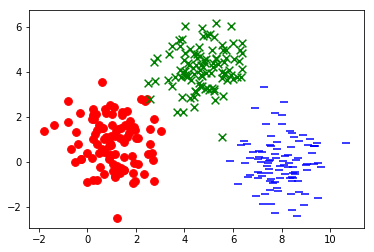

w [[-2.4061122   0.28823653  2.1178758 ]
 [-0.67002463  1.5133451  -0.843316  ]]
b [10.613634  -2.4377291 -8.175909 ]
accuracy 1.0


In [0]:
def ex7():
  train_data = ex7_data()
  ex7_plot(train_data)
  test_data = ex7_data(10)
  ex7_train(train_data, test_data)

ex7()

# Example 8 - Learn Keras

In [0]:
def ex8():
  num_class = 10
  
  mnist = tf.keras.datasets.mnist
  (x_train, y_train), (x_test, y_test) = mnist.load_data()
  
  image_vector_size = 28*28
  x_train = x_train.reshape(x_train.shape[0], image_vector_size)
  x_test = x_test.reshape(x_test.shape[0], image_vector_size)
  
  y_train = keras.utils.to_categorical(y_train, num_class)
  y_test = keras.utils.to_categorical(y_test, num_class)
  
  dataset = tf.data.Dataset.from_tensor_slices(
      (tf.cast(x_train/255.0, tf.float32), 
       tf.cast(y_train,tf.int64)))
  
  dataset = dataset.shuffle(60000).batch(64)
  
  mnist_model = keras.Sequential([
      keras.layers.Dense(1024, input_shape=(784,)),
      keras.layers.Dense(1024),
      keras.layers.Dense(10)
  ])
  
  optimizer = tf.train.AdamOptimizer()
  loss_history = []
  
  for i in range(10): # Epochs
    print ("\nEpoch:", i)
    for (batch, (images, labels)) in enumerate(dataset.take(60000)):
      if batch % 100 == 0:
        print('.', end='')
      with tf.GradientTape() as tape:
        logits = mnist_model(images, training=True) # Prediction of the model
        loss_value = tf.losses.sparse_softmax_cross_entropy(
            tf.argmax(labels, axis = 1), logits)
        loss_history.append(loss_value.numpy())
        grads = tape.gradient(loss_value, mnist_model.variables)
        # Evaluation of gradients
        optimizer.apply_gradients(
            zip(grads, mnist_model.variables),
            global_step=tf.train.get_or_create_global_step())
        grads = tape.gradient(loss_value, mnist_model.variables)
        optimizer.apply_gradients(
            zip(grads, mnist_model.variables),
            global_step=tf.train.get_or_create_global_step())